# Lead Case Study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler


In [2]:
lead=pd.read_csv('D:/task/Leads.csv')
lead.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#checking total rows and cols in dataset
lead.shape

(9240, 37)

In [5]:
#basic data check
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead.describe()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#check for duplicates
sum(lead.duplicated(subset = 'Prospect ID')) == 0

True

In [8]:
#check for duplicates
sum(lead.duplicated(subset = 'Lead Number')) == 0

True

Data Cleaning

In [9]:
#dropping Lead Number and Prospect ID since they have all unique values

lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [10]:
#Converting 'Select' values to NaN.

lead = lead.replace('Select', np.nan)

In [11]:
#checking null values in each rows

lead.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [12]:
#checking percentage of null values in each column

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [13]:
#dropping cols with more than 45% missing values

cols=lead.columns

for i in cols:
    if((100*(lead[i].isnull().sum()/len(lead.index))) >= 45):
        lead.drop(i, 1, inplace = True)

In [14]:
#checking null values percentage

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

Categorial value

In [15]:
#checking value counts of Country column

lead['Country'].value_counts(dropna=False)


India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
South Africa               4
Kuwait                     4
Canada                     4
Germany                    4
Sweden                     3
Uganda                     2
Philippines                2
Netherlands                2
China                      2
Ghana                      2
Italy                      2
Bangladesh                 2
Asia/Pacific Region        2
Belgium                    2
Indonesia                  1
Kenya                      1
Denmark                    1
Switzerland                1
Liberia                    1
Tanzania      

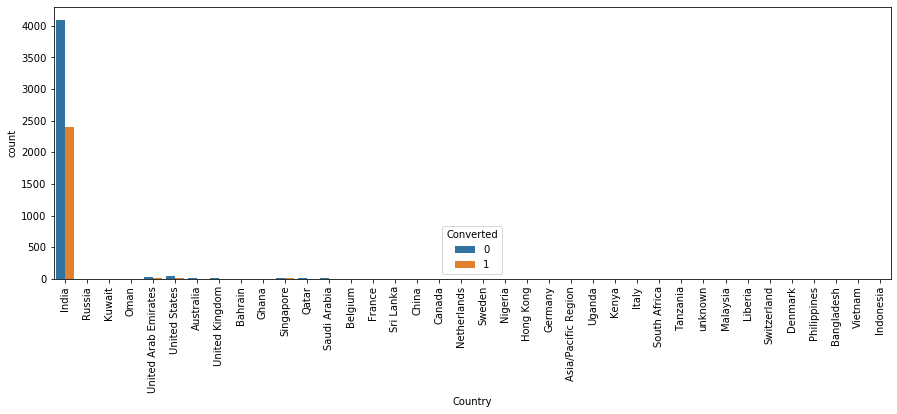

In [16]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s=sns.countplot(lead.Country, hue=lead.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [17]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

lead['Country'] = lead['Country'].replace(np.nan,'India')

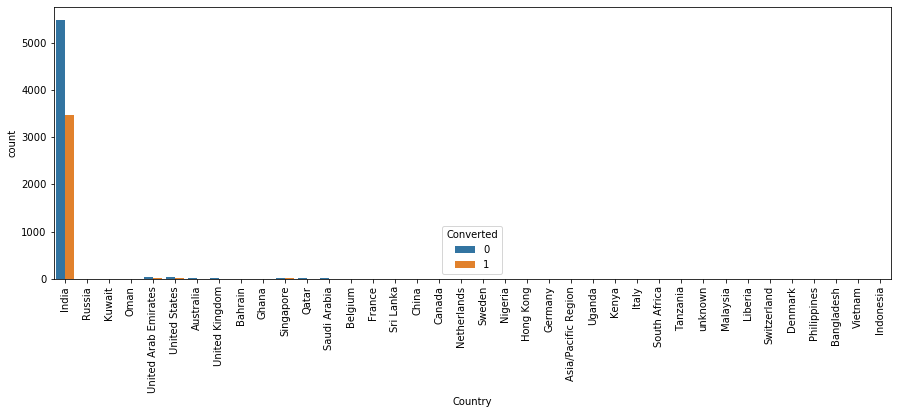

In [18]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
s=sns.countplot(lead.Country, hue=lead.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [19]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [20]:
#checking value counts of "City" column

lead['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [21]:
lead['City'] = lead['City'].replace(np.nan,'Mumbai')

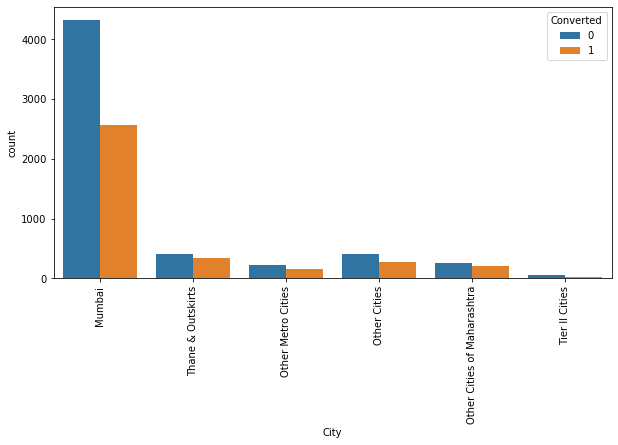

In [22]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s=sns.countplot(lead.City, hue=lead.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [23]:
#checking value counts of Specialization column

lead['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [24]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Not Specified')

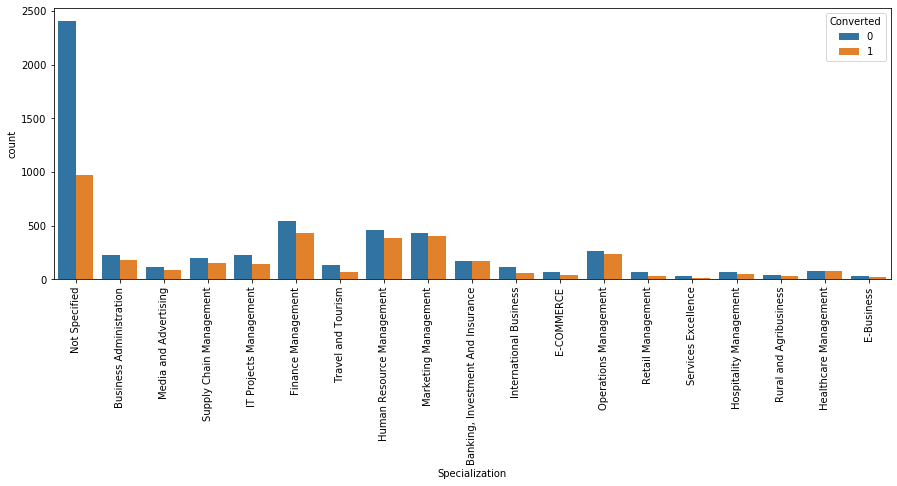

In [25]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s=sns.countplot(lead.Specialization, hue=lead.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [26]:
#combining Management Specializations because they show similar trends

lead['Specialization'] = lead['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  


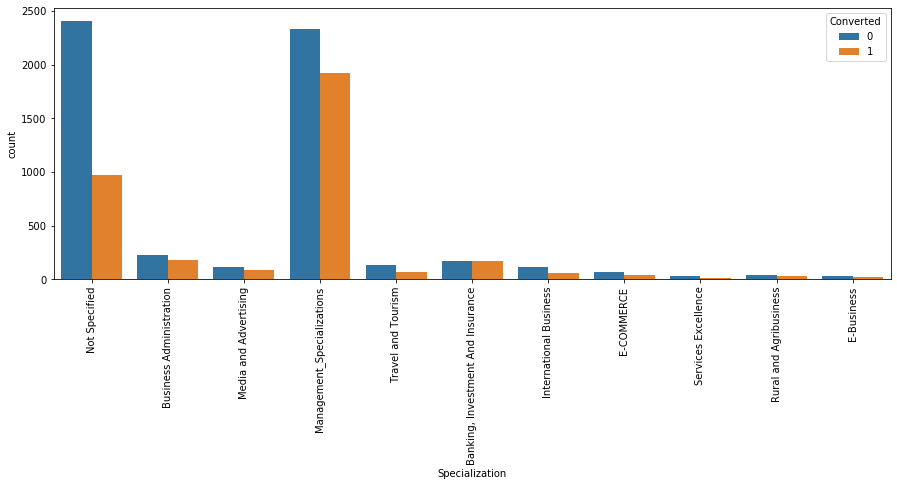

In [27]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s=sns.countplot(lead.Specialization, hue=lead.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()


In [28]:
#What is your current occupation

lead['What is your current occupation'].value_counts(dropna=False)


Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
#imputing Nan values with mode "Unemployed"

lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

In [30]:
#checking count of values
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

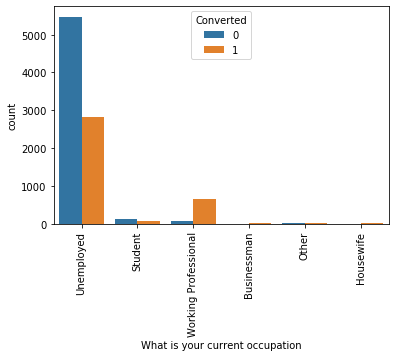

In [31]:
#visualizing count of Variable based on Converted value

s=sns.countplot(lead['What is your current occupation'], hue=lead.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [32]:
#checking value counts

lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
#replacing Nan values with Mode "Better Career Prospects"

lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

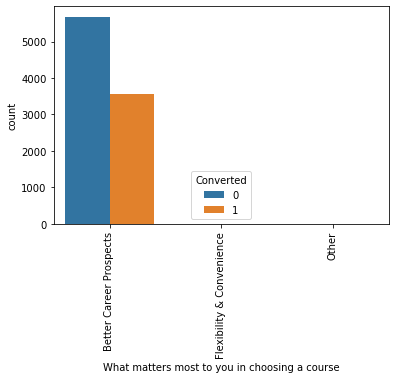

In [34]:

s=sns.countplot(lead['What matters most to you in choosing a course'], hue=lead.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()


In [35]:
#checking value counts of variable
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [36]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [37]:
#checking value counts of Tag variable
lead['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [38]:
#replacing Nan values with "Not Specified"
lead['Tags'] = lead['Tags'].replace(np.nan,'Not Specified')


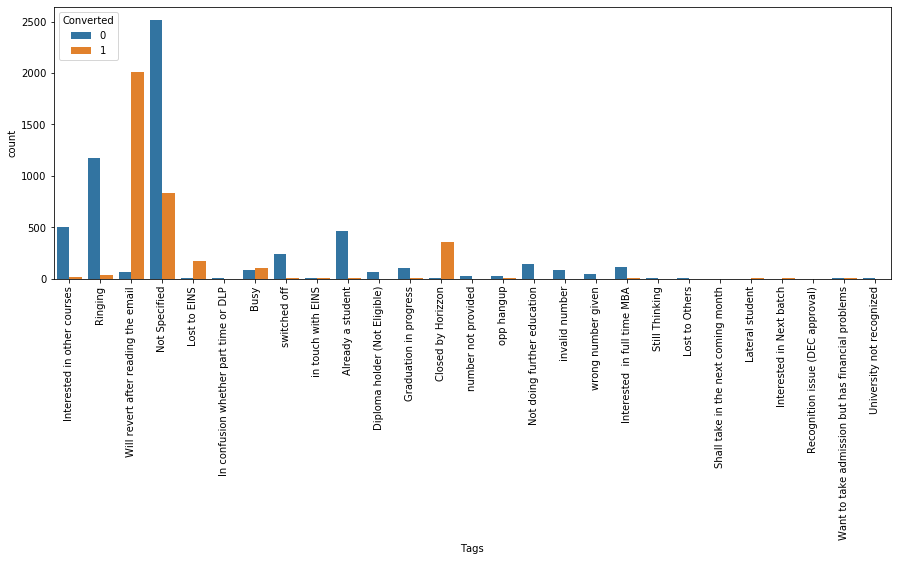

In [39]:

plt.figure(figsize=(15,5))
s=sns.countplot(lead['Tags'], hue=lead.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [40]:
#replacing tags with low frequency with "Other Tags"
lead['Tags'] = lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

lead['Tags'] = lead['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [41]:
#checking percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [42]:
#checking value counts of Lead Source column

lead['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
blog                    1
WeLearn                 1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [43]:
#replacing Nan Values and combining low frequency values
lead['Lead Source'] = lead['Lead Source'].replace(np.nan,'Others')
lead['Lead Source'] = lead['Lead Source'].replace('google','Google')
lead['Lead Source'] = lead['Lead Source'].replace('Facebook','Social Media')
lead['Lead Source'] = lead['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')    

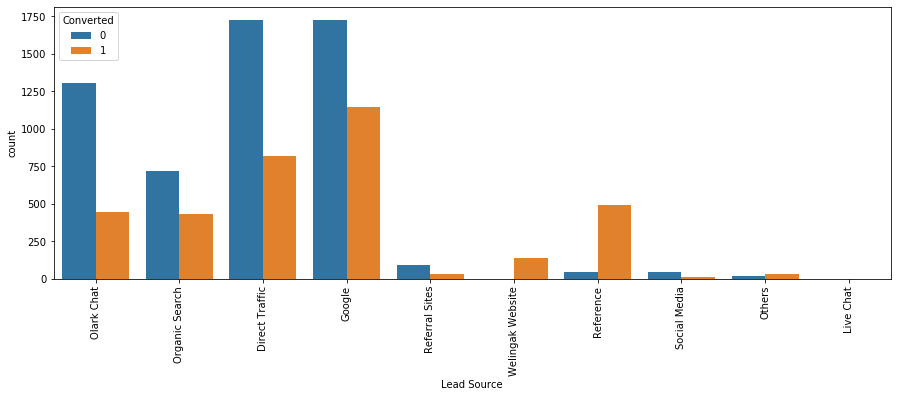

In [44]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s=sns.countplot(lead['Lead Source'], hue=lead.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [45]:
# Last Activity:

lead['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [46]:
#replacing Nan Values and combining low frequency values

lead['Last Activity'] = lead['Last Activity'].replace(np.nan,'Others')
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [47]:
# Last Activity:

lead['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [48]:
#Check the Null Values in All Columns:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [49]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
lead = lead.dropna()

In [50]:
#Checking percentage of Null Values in All Columns:
round(100*(lead.isnull().sum()/len(lead.index)), 2)


Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [51]:
#Lead Origin
lead['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

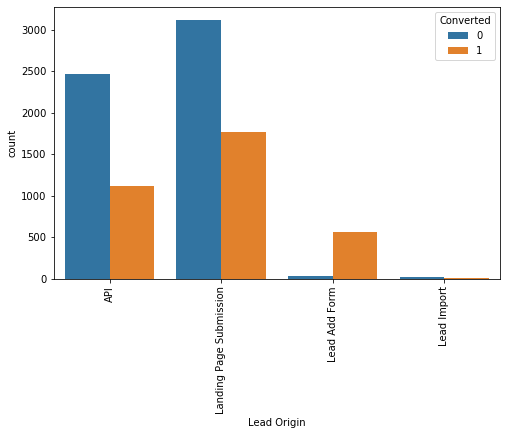

In [52]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s=sns.countplot(lead['Lead Origin'], hue=lead.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

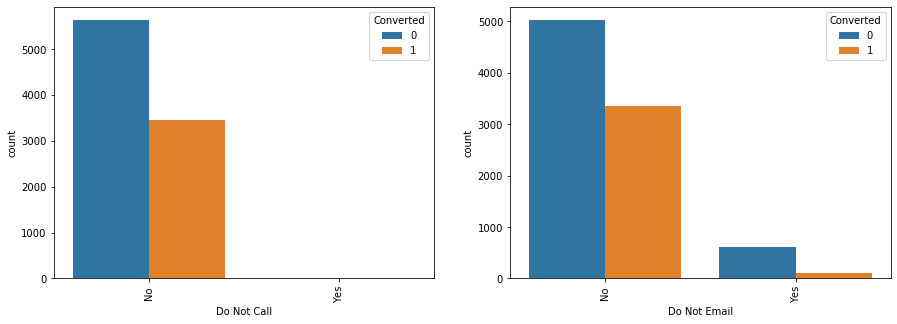

In [53]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(lead['Do Not Call'], hue=lead.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(lead['Do Not Email'], hue=lead.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()


In [54]:
#checking value counts for Do Not Call
lead['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [55]:
#checking value counts for Do Not Email
lead['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [56]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [57]:
lead.Search.value_counts(dropna=False)


No     9089
Yes      14
Name: Search, dtype: int64

In [58]:
lead.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [59]:
lead['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [60]:
lead['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [61]:
lead['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [62]:
lead['Digital Advertisement'].value_counts(dropna=False)


No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [63]:
lead['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [64]:
lead['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [65]:
lead['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [66]:
lead['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [67]:
lead['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [68]:
lead['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [69]:

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])


In [70]:
#checking value counts of last Notable Activity
lead['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Approached upfront                 1
Email Received                     1
View in browser link Clicked       1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [72]:
#clubbing lower frequency values

lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')


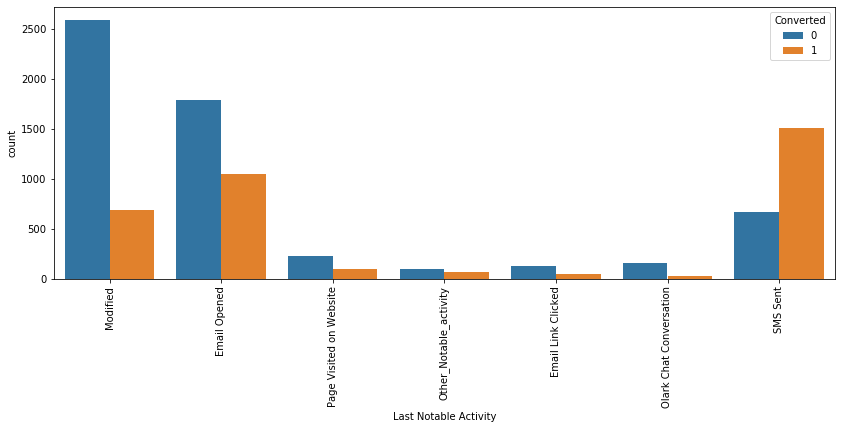

In [73]:

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [74]:
#checking value counts for variable

lead['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [75]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [76]:
#dropping columns
lead = lead.drop(cols_to_drop,1)
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

Numerical Attributes

In [77]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted


38.02043282434362

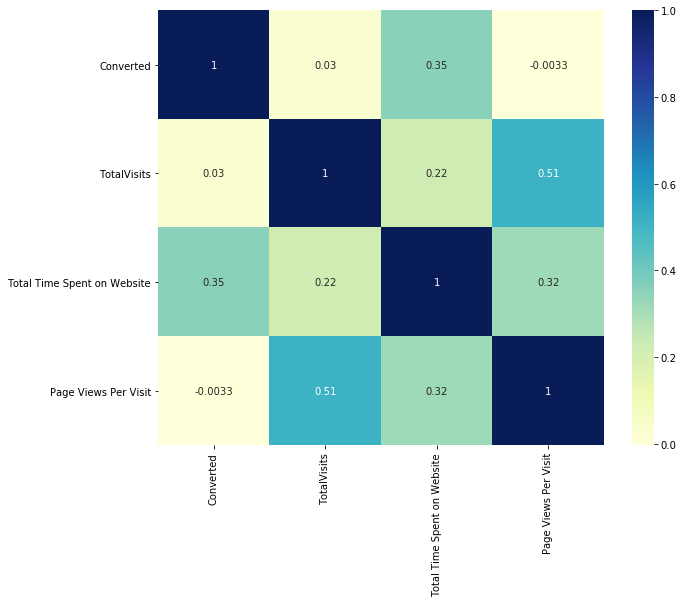

In [78]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(lead.corr(), cmap="YlGnBu", annot=True)
plt.show()

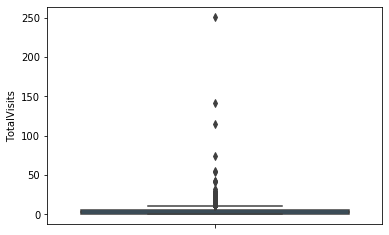

In [79]:
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=lead['TotalVisits'])
plt.show()


In [80]:

lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

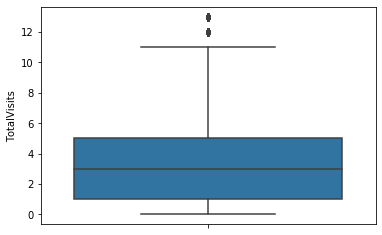

In [82]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = lead.TotalVisits.quantile(0.99)
lead = lead[(lead.TotalVisits <= Q3)]
Q1 = lead.TotalVisits.quantile(0.01)
lead = lead[(lead.TotalVisits >= Q1)]
sns.boxplot(y=lead['TotalVisits'])
plt.show()

In [86]:
lead.shape

(8929, 14)

In [87]:
#checking percentiles for "Total Time Spent on Website"

lead['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8929.000000
mean      476.246612
std       543.335243
min         0.000000
5%          0.000000
25%         4.000000
50%       239.000000
75%       905.000000
90%      1368.000000
95%      1552.000000
99%      1836.440000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

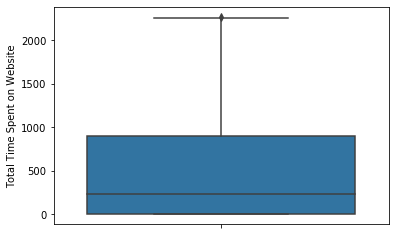

In [88]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=lead['Total Time Spent on Website'])
plt.show()

In [89]:
#checking spread of "Page Views Per Visit"

lead['Page Views Per Visit'].describe()

count    8929.000000
mean        2.303194
std         1.993860
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        13.000000
Name: Page Views Per Visit, dtype: float64

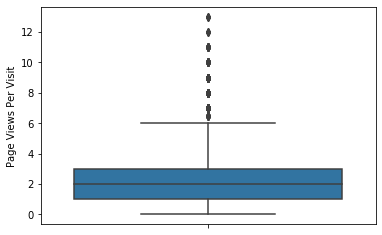

In [90]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=lead['Page Views Per Visit'])
plt.show()

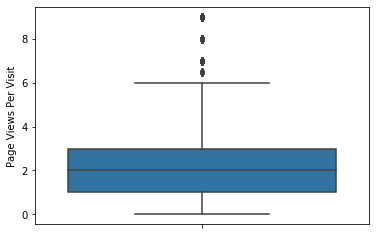

In [92]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[lead['Page Views Per Visit'] <= Q3]
Q1 = lead['Page Views Per Visit'].quantile(0.01)
lead = lead[lead['Page Views Per Visit'] >= Q1]
sns.boxplot(y=lead['Page Views Per Visit'])
plt.show()

In [93]:
lead.shape

(8878, 14)

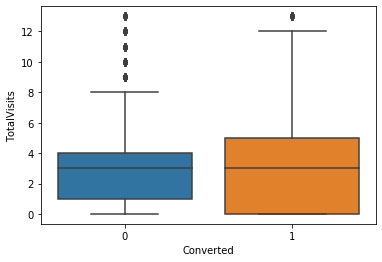

In [94]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)
plt.show()

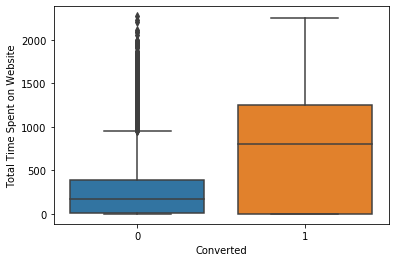

In [95]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=lead.Converted, y=lead['Total Time Spent on Website'])
plt.show()

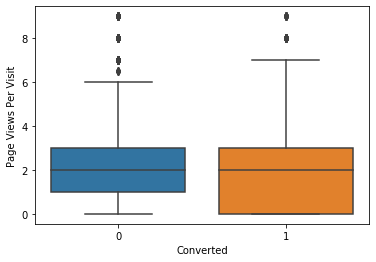

In [96]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=lead.Converted,y=lead['Page Views Per Visit'])
plt.show()

In [97]:
round(100*(lead.isnull().sum()/len(lead.index)),2)


Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

Dummy Variables

In [99]:
#getting a list of categorical columns

cat_cols= lead.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [100]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)

In [102]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(lead[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

lead = pd.concat([lead,dummy],1)

In [103]:
dummy = pd.get_dummies(lead['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
lead = pd.concat([lead, dummy], axis = 1)

In [104]:
dummy = pd.get_dummies(lead['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
lead = pd.concat([lead, dummy], axis = 1)

In [105]:
dummy = pd.get_dummies(lead['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
lead = pd.concat([lead, dummy], axis = 1)

In [106]:
dummy = pd.get_dummies(lead['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
lead = pd.concat([lead, dummy], axis = 1)

In [107]:
dummy = pd.get_dummies(lead['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
lead = pd.concat([lead, dummy], axis = 1)

In [108]:
#dropping the original columns after dummy variable creation

lead.drop(cat_cols,1,inplace = True)

In [109]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Train Test

In [110]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = lead['Converted']

y.head()

X=lead.drop('Converted', axis=1)

In [111]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [112]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 1233 to 5879
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6214 non-null   float64
 1   Total Time Spent on Website                           6214 non-null   int64  
 2   Page Views Per Visit                                  6214 non-null   float64
 3   Lead Origin_Landing Page Submission                   6214 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6214 non-null   uint8  
 5   Lead Origin_Lead Import                               6214 non-null   uint8  
 6   What is your current occupation_Housewife             6214 non-null   uint8  
 7   What is your current occupation_Other                 6214 non-null   uint8  
 8   What is your current occupation_Student               6

Scaling

In [113]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1233,-1.130693,-0.871154,-1.193107,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6078,-1.130693,-0.871154,-1.193107,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6404,-0.010992,-0.743835,0.402109,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4409,-1.130693,-0.871154,-1.193107,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1927,-1.130693,-0.871154,-1.193107,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Model Building

In [114]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [115]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True,  True, False,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True])

In [116]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 25),
 ('What is your current occupation_Housewife', False, 23),
 ('What is your current occupation_Other', False, 29),
 ('What is your current occupation_Student', False, 7),
 ('What is your current occupation_Unemployed', False, 6),
 ('What is your current occupation_Working Professional', False, 16),
 ('City_Other Cities', False, 33),
 ('City_Other Cities of Maharashtra', False, 38),
 ('City_Other Metro Cities', False, 31),
 ('City_Thane & Outskirts', False, 41),
 ('City_Tier II Cities', False, 26),
 ('Specialization_Banking, Investment And Insurance', False, 30),
 ('Specialization_Business Administration', False, 40),
 ('Specialization_E-Business', False, 37),
 ('Specialization_E-COMMERCE', False, 34),
 ('Specialization_International Business', Fal

In [117]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [118]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Sourc

In [119]:
#model 1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6214
Model:                            GLM   Df Residuals:                     6198
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1222.7
Date:                Tue, 12 May 2020   Deviance:                       2445.3
Time:                        11:47:07   Pearson chi2:                 8.75e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7560      0.100    -17.622      0.000      -1.951      -1.561
Total Time Spent on Website                  1.0556      0.061     17.441      0.000       0.937       1.174
Lead Origin_Lead Add Form                    1.8910      0.425      4.446      0.000       1.057       2.725
Lead Source_Olark Chat                       1.4277      0.149      9.558      0.000       1.135       1.720
Lead Source_Welingak Website                24.7394    1.8e+04      0.001      0.999   -3.53e+04    3.54e+04
Last Activity_Olark Chat Conversation       -0.7773      0.229     -3.388      0.001      -1.227      -0.328
Last Activity_SMS Sent                       1.4249      0.230      6.187      0.000       0.974       1.876
Last Notable Activity_Email Link Clicked    -1.0993      0.427     -2.573      0.010      -1.937      -0.262
Last Notable Activity_Modified              -1.2409      0.161     -7.704      0.000      -1.557      -0.925
Last Notable Activity_SMS Sent               0.7837      0.261      2.998      0.003       0.271       1.296
Tags_Closed by Horizzon                      7.0777      1.023      6.920      0.000       5.073       9.082
Tags_Interested in other courses            -1.8582      0.405     -4.585      0.000      -2.653      -1.064
Tags_Lost to EINS                            5.5441      0.604      9.172      0.000       4.359       6.729
Tags_Other_Tags                             -2.6260      0.228    -11.533      0.000      -3.072      -2.180
Tags_Ringing                                -3.5673      0.243    -14.661      0.000      -4.044      -3.090
Tags_Will revert after reading the email     4.5287      0.192     23.572      0.000       4.152       4.905
============================================================================================================
"""

In [121]:
#model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6214
Model:                            GLM   Df Residuals:                     6198
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1222.7
Date:                Tue, 12 May 2020   Deviance:                       2445.3
Time:                        11:49:07   Pearson chi2:                 8.75e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7560      0.100    -17.622      0.000      -1.951      -1.561
Total Time Spent on Website                  1.0556      0.061     17.441      0.000       0.937       1.174
Lead Origin_Lead Add Form                    1.8910      0.425      4.446      0.000       1.057       2.725
Lead Source_Olark Chat                       1.4277      0.149      9.558      0.000       1.135       1.720
Lead Source_Welingak Website                24.7394    1.8e+04      0.001      0.999   -3.53e+04    3.54e+04
Last Activity_Olark Chat Conversation       -0.7773      0.229     -3.388      0.001      -1.227      -0.328
Last Activity_SMS Sent                       1.4249      0.230      6.187      0.000       0.974       1.876
Last Notable Activity_Email Link Clicked    -1.0993      0.427     -2.573      0.010      -1.937      -0.262
Last Notable Activity_Modified              -1.2409      0.161     -7.704      0.000      -1.557      -0.925
Last Notable Activity_SMS Sent               0.7837      0.261      2.998      0.003       0.271       1.296
Tags_Closed by Horizzon                      7.0777      1.023      6.920      0.000       5.073       9.082
Tags_Interested in other courses            -1.8582      0.405     -4.585      0.000      -2.653      -1.064
Tags_Lost to EINS                            5.5441      0.604      9.172      0.000       4.359       6.729
Tags_Other_Tags                             -2.6260      0.228    -11.533      0.000      -3.072      -2.180
Tags_Ringing                                -3.5673      0.243    -14.661      0.000      -4.044      -3.090
Tags_Will revert after reading the email     4.5287      0.192     23.572      0.000       4.152       4.905
============================================================================================================
"""

In [122]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
#e VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
8,Last Notable Activity_SMS Sent,6.55
5,Last Activity_SMS Sent,6.44
7,Last Notable Activity_Modified,2.07
1,Lead Origin_Lead Add Form,1.83
2,Lead Source_Olark Chat,1.66
14,Tags_Will revert after reading the email,1.62
4,Last Activity_Olark Chat Conversation,1.59
0,Total Time Spent on Website,1.43
3,Lead Source_Welingak Website,1.30
9,Tags_Closed by Horizzon,1.24


In [125]:

col = col.drop('Last Notable Activity_SMS Sent',1)

In [126]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6214
Model:                            GLM   Df Residuals:                     6199
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1227.2
Date:                Tue, 12 May 2020   Deviance:                       2454.4
Time:                        11:51:22   Pearson chi2:                 9.04e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7021      0.097    -17.532      0.000      -1.892      -1.512
Total Time Spent on Website                  1.0529      0.060     17.441      0.000       0.935       1.171
Lead Origin_Lead Add Form                    1.8664      0.428      4.360      0.000       1.027       2.705
Lead Source_Olark Chat                       1.4306      0.148      9.642      0.000       1.140       1.721
Lead Source_Welingak Website                24.7531   1.79e+04      0.001      0.999   -3.51e+04    3.51e+04
Last Activity_Olark Chat Conversation       -0.6650      0.227     -2.928      0.003      -1.110      -0.220
Last Activity_SMS Sent                       2.0193      0.118     17.096      0.000       1.788       2.251
Last Notable Activity_Email Link Clicked    -1.1785      0.431     -2.737      0.006      -2.022      -0.335
Last Notable Activity_Modified              -1.5512      0.129    -12.010      0.000      -1.804      -1.298
Tags_Closed by Horizzon                      7.2593      1.023      7.094      0.000       5.254       9.265
Tags_Interested in other courses            -1.8069      0.406     -4.452      0.000      -2.602      -1.011
Tags_Lost to EINS                            5.6750      0.606      9.360      0.000       4.487       6.863
Tags_Other_Tags                             -2.5775      0.225    -11.433      0.000      -3.019      -2.136
Tags_Ringing                                -3.4728      0.239    -14.534      0.000      -3.941      -3.005
Tags_Will revert after reading the email     4.6031      0.194     23.734      0.000       4.223       4.983
============================================================================================================
"""

In [127]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,Lead Origin_Lead Add Form,1.83
2,Lead Source_Olark Chat,1.65
7,Last Notable Activity_Modified,1.64
13,Tags_Will revert after reading the email,1.56
4,Last Activity_Olark Chat Conversation,1.55
5,Last Activity_SMS Sent,1.50
0,Total Time Spent on Website,1.43
3,Lead Source_Welingak Website,1.30
8,Tags_Closed by Horizzon,1.23
11,Tags_Other_Tags,1.15


In [128]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]


1233    0.060663
6078    0.060663
6404    0.045500
4409    0.014404
1927    0.979818
1969    0.696494
7413    0.113653
7097    0.005548
327     0.978739
6215    0.203400
dtype: float64

In [129]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.06066318, 0.06066318, 0.04550008, 0.01440366, 0.97981785,
       0.69649364, 0.11365324, 0.00554797, 0.97873938, 0.20339953])

In [130]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID
0,0,0.060663,1233
1,0,0.060663,6078
2,0,0.045500,6404
3,0,0.014404,4409
4,1,0.979818,1927


In [131]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.060663,1233,0
1,0,0.060663,6078,0
2,0,0.045500,6404,0
3,0,0.014404,4409,0
4,1,0.979818,1927,1


In [132]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3715  157]
 [ 304 2038]]


In [133]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9258126810428066


In [134]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [135]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8701964133219471

In [136]:
# Let us calculate specificity
TN / float(TN+FP)

0.9594524793388429

In [137]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04054752066115702


In [138]:
# positive predictive value 
print (TP / float(TP+FP))

0.9284738041002278


In [139]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9243592933565563


Plotting ROC Curve

In [141]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [142]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

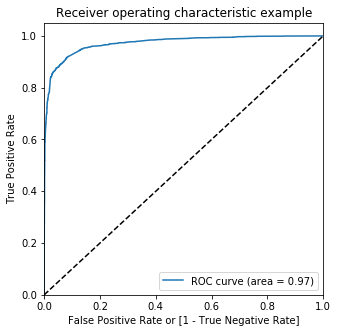

In [143]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [144]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.060663,1233,0,1,0,0,0,0,0,0,0,0,0
1,0,0.060663,6078,0,1,0,0,0,0,0,0,0,0,0
2,0,0.045500,6404,0,1,0,0,0,0,0,0,0,0,0
3,0,0.014404,4409,0,1,0,0,0,0,0,0,0,0,0
4,1,0.979818,1927,1,1,1,1,1,1,1,1,1,1,1


Optimal cutoff

In [146]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376891  1.000000  0.000000
0.1   0.1  0.837947  0.969684  0.758264
0.2   0.2  0.897490  0.948335  0.866736
0.3   0.3  0.918249  0.912468  0.921746
0.4   0.4  0.921950  0.889838  0.941374
0.5   0.5  0.925813  0.870196  0.959452
0.6   0.6  0.926617  0.851836  0.971849
0.7   0.7  0.911651  0.797182  0.980888
0.8   0.8  0.902639  0.766012  0.985279
0.9   0.9  0.883972  0.707942  0.990444


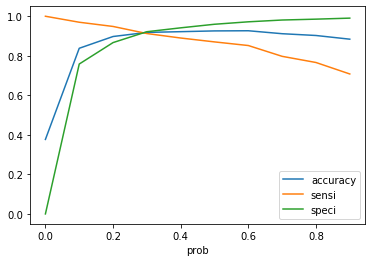

In [147]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [148]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.060663,1233,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.060663,6078,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.045500,6404,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.014404,4409,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.979818,1927,1,1,1,1,1,1,1,1,1,1,1,1


In [149]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.060663,1233,0,6
1,0,0.060663,6078,0,6
2,0,0.045500,6404,0,5
3,0,0.014404,4409,0,1
4,1,0.979818,1927,1,98


In [150]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9182491149018346

In [151]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3569,  303],
       [ 205, 2137]], dtype=int64)

In [152]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [153]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.912467976088813

In [154]:
# Let us calculate specificity
TN / float(TN+FP)

0.921745867768595

In [155]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.07825413223140495


In [156]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8758196721311475


In [157]:
# Negative predictive value
print (TN / float(TN+ FN))


0.9456809750927399


In [158]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3569,  303],
       [ 205, 2137]], dtype=int64)

In [159]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8758196721311475

In [160]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.912467976088813

In [161]:
from sklearn.metrics import precision_score, recall_score

In [162]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8758196721311475

In [163]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.912467976088813

In [164]:
from sklearn.metrics import precision_recall_curve

In [165]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

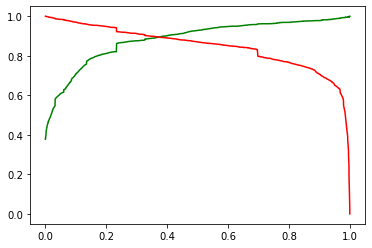

In [166]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [167]:
#scaling test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1103,0.713461,1.713072,1.424441,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3775,-1.130765,-0.881876,-1.192363,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3228,0.344615,1.528111,0.901080,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5575,-1.130765,-0.881876,-1.192363,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3871,-1.130765,-0.881876,-1.192363,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [169]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1103,1.713072,0,0,0,0,1,0,0,0,0,0,0,0,1
3775,-0.881876,0,1,0,1,0,0,1,0,1,0,0,0,0
3228,1.528111,0,0,0,0,1,0,0,0,0,0,0,0,0
5575,-0.881876,1,0,0,0,0,0,0,0,0,0,1,0,0
3871,-0.881876,0,1,0,0,0,0,0,0,0,0,0,0,0


In [170]:
X_test_sm = sm.add_constant(X_test)


predictions of test

In [171]:
y_test_pred = res.predict(X_test_sm)

In [172]:
y_test_pred[:10]

1103    0.998800
3775    0.005362
3228    0.872815
5575    0.034166
3871    0.231487
948     0.976854
8836    0.056412
8512    0.005362
8548    0.016591
2126    0.992924
dtype: float64

In [173]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)


In [174]:
# Let's see the head
y_pred_1.head()

,0
1103,0.998800
3775,0.005362
3228,0.872815
5575,0.034166
3871,0.231487


In [175]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [176]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [177]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [178]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [179]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,1103,0.998800
1,0,3775,0.005362
2,0,3228,0.872815
3,0,5575,0.034166
4,0,3871,0.231487


In [180]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})


In [181]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,1103,0.998800
1,0,3775,0.005362
2,0,3228,0.872815
3,0,5575,0.034166
4,0,3871,0.231487


In [182]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))


In [183]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,1103,1,0.998800,100
1,3775,0,0.005362,1
2,3228,0,0.872815,87
3,5575,0,0.034166,3
4,3871,0,0.231487,23


In [184]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [185]:
y_pred_final.head()


,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,1103,1,0.998800,100,1
1,3775,0,0.005362,1,0
2,3228,0,0.872815,87,1
3,5575,0,0.034166,3,0
4,3871,0,0.231487,23,0


In [186]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)



0.926051051051051

In [187]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1524,  120],
       [  77,  943]], dtype=int64)

In [188]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [189]:
# Let us calculate specificity
TN / float(TN+FP)


0.927007299270073

In [190]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)


0.8871119473189087

In [191]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9245098039215687

observation
After running the model on the Test Data these are the figures we obtain:

Accuracy : 92% Sensitivity : 91% Specificity : 93%

# observation
After running the model on the Test Data these are the figures we obtain:

Accuracy : 92.78%
Sensitivity : 91.98%
Specificity : 93.26%

Train Accuracy : 92% Sensitivity : 91% Specificity : 92%

Test Accuracy : 92% Sensitivity : 91% Specificity : 93%

#test
Accuracy : 92.78%
Sensitivity : 91.98%
Specificity : 93.26%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model